In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [8]:
page = requests.get("https://www.sayfiereview.com/")

In [9]:
soup = BeautifulSoup(page.content, 'html.parser')

In [12]:
div_bcd = soup.find('div', class_ ='blogticker_content_div')
len(div_bcd.find_all('a', class_='daily_link_link'))

17

In [13]:
soup.find_all('a', class_='daily_link_link')
len(soup.find_all('a', class_='daily_link_link'))

90

In [14]:
headline = []
for i in range(len(soup.find_all('a', class_='daily_link_link'))):
    headline.append((soup.find_all('a', class_='daily_link_link')[i].text).split(':', 1))
for i in range(len(div_bcd.find_all('a', class_='daily_link_link'))):
    headline.append((div_bcd.find_all('a', class_='daily_link_link')[i].text).split(':', 1))

In [15]:
df = pd.DataFrame(headline,columns=['source','headline'])

In [27]:
#DROPPED FIRST ROW AS IT'S HEADLINE IS NULL
df = df.drop(df.index[0])

In [17]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "C:\\Users\\korupos\\Documents\\FLShots\\sentiment-310619-8cf4e49950c0.json"

In [18]:
# Imports the Google Cloud client library
from google.cloud import language_v1

In [38]:
# Instantiates a client
client = language_v1.LanguageServiceClient()

Text: Hello, world!
0.6000000238418579


In [42]:
senti = []
for i in df['headline']:
    text = i
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    senti.append(round(sentiment.score, 2))

In [51]:
df['sentiment_score'] = senti

In [112]:
df.to_csv('sayfiereview.csv')

<AxesSubplot:>

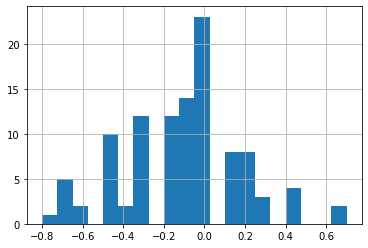

In [48]:
df['sentiment score'].hist(bins=20)

In [65]:
pos = df[df.sentiment_score > 0]
neg = df[df.sentiment_score < 0]
neu = df[df.sentiment_score == 0]

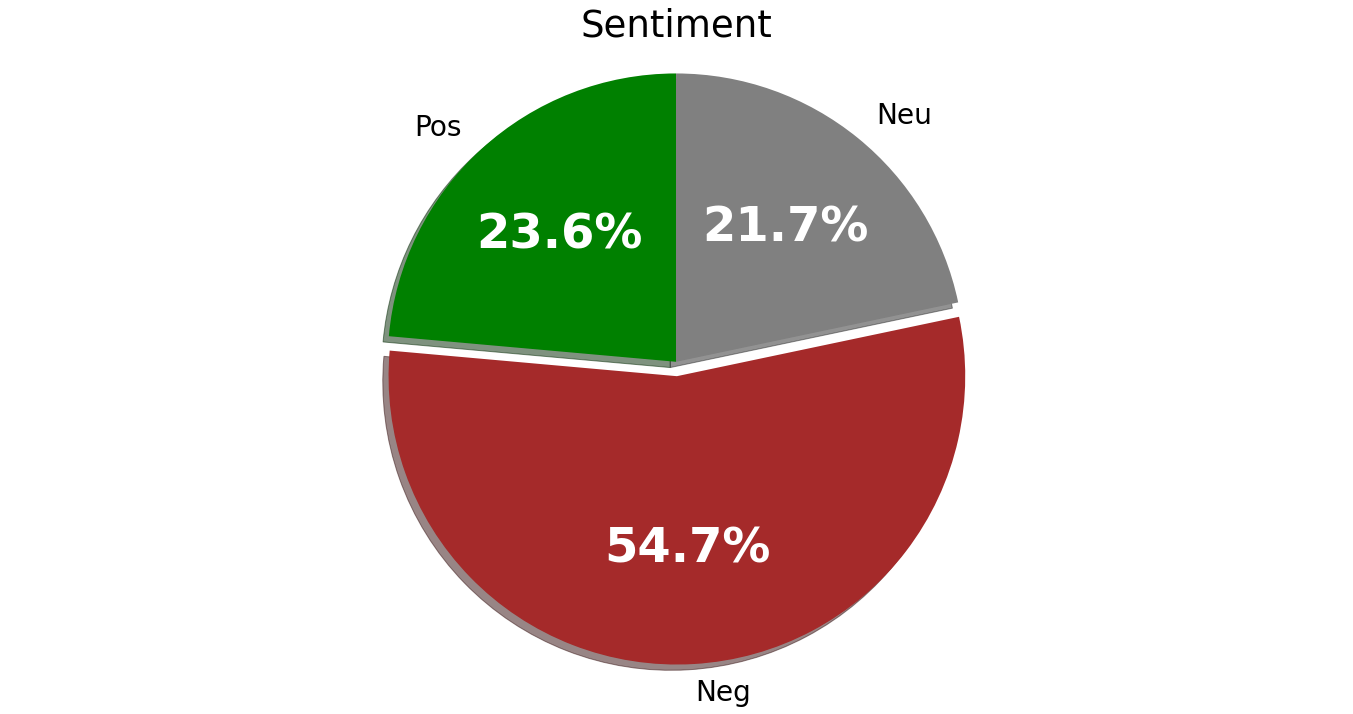

In [90]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pos', 'Neg', 'Neu'
sizes = [len(pos), len(neg), len(neu)]
colors = 'green','brown','grey'

explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(24,12))
_, _, autopcts = ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90,
       textprops={'fontsize': 28})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':48})
ax1.set_title('Sentiment', fontdict={'fontsize': 37})

plt.show()

In [94]:
pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
neg.sort_values(by=['sentiment_score'], inplace=True)

<ipython-input-94-27507b3013ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)


In [110]:
pos.head(10)

,source,headline,sentiment_score
74,Florida Humanities Council,CULTURAL TOURISM IS ALIVE AND WELL IN APALACH...,0.7
19,Ledger,Publix named 42nd best company to work for in...,0.7
63,Orlando Political Observer,Murphy Helps Reintroduce Legislation to Ensur...,0.4
32,CBS Miami,Florida House Condemns Democratic Socialism ...,0.4
35,CBS Miami,Florida House Could Open Door To Pre-Game Pr...,0.4
2,Politico,Gaetz's glare stings House GOP - but his futu...,0.4
76,Florida Red & Blue,Fourteen Major Florida Dailies Recommend Voti...,0.3
84,Workers’ Comp Coalition,Florida Supreme Court Overturns Limits,0.3
33,FlaPol,Workforce revamp bills ready for House vote,0.3
20,NBC Miami,Florida Following CDC Recommendation to Paus...,0.2


In [111]:
neg.head(10)

,source,headline,sentiment_score
27,My News 13,Teachers worry about pensions as SB 84 heads ...,-0.8
39,Sentinel,Florida House ready to ban transgender female...,-0.7
11,Herald Tribune,DeSantis endorses effort to close Piney Point,-0.7
22,The Capitolist,Were the words of the Governor and his paneli...,-0.7
90,Sentinel,Florida House ready to ban transgender female...,-0.7
57,Ocala Post,Marion County Sheriff's Office accused of ove...,-0.7
44,Sentinel,Florida Senate eyes corporate tax cuts after ...,-0.6
95,Sentinel,Florida Senate eyes corporate tax cuts after ...,-0.6
99,Sentinel,Records: Joel Greenberg doled out contracts t...,-0.5
51,Sentinel,"Gearing up for reelection, DeSantis political...",-0.5
